In [2]:
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


C:\Users\harkum\AppData\Local\Temp\ipykernel_30732\2669341784.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
tweets = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding="ISO-8859-1", names=['target','id','date','flag','user','text'])
tweets.head()

In [6]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1",engine='python',names=['label', 'time', 'date', 'query', 'username', 'text'])

In [3]:
tweets.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [4]:
tweets.sample(10)

,target,id,date,flag,user,text
188709,0,1968933086,Fri May 29 22:34:57 PDT 2009,NO_QUERY,Mariell96,@tricia_4 ate!!!!! nakita ko nga ung magkasuno...
939460,4,1793682013,Thu May 14 03:37:11 PDT 2009,NO_QUERY,MichealAxelsen,"@kissability LOL anyhoo, how about that traffi..."
1099404,4,1970570898,Sat May 30 04:23:51 PDT 2009,NO_QUERY,amarska,enjoying national geographic again..
1405228,4,2055153971,Sat Jun 06 08:47:59 PDT 2009,NO_QUERY,BarbaraKB,@BeckyMcCray A week of fun w/son &amp; then so...
748645,0,2284512750,Mon Jun 22 13:58:34 PDT 2009,NO_QUERY,AdrianRatcliffe,Settling down to watch BB. Hope there's some ...
702054,0,2255276983,Sat Jun 20 11:01:27 PDT 2009,NO_QUERY,beewsee,@LaceySchwimmer Came out yesterday but you may...
1060020,4,1963354813,Fri May 29 12:35:50 PDT 2009,NO_QUERY,PauletteJaxton,"@SVAllie Looks good, but somehow Cthulhu and p..."
1125244,4,1974810318,Sat May 30 13:53:09 PDT 2009,NO_QUERY,maxamphoto,@jeffcrossphoto Thanks for the comment on my b...
522529,0,2192789508,Tue Jun 16 07:33:09 PDT 2009,NO_QUERY,blackc2004,got pulled over for my tinted windows this mor...
1492571,4,2069322995,Sun Jun 07 15:40:02 PDT 2009,NO_QUERY,MaschaD,@Dave_Annable good for u Dave sometimes u gott...


In [5]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harkum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
tweets.shape

(1600000, 6)

In [7]:
tweets.isnull().sum() # There are no missing values in the dataset 

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [8]:
tweets.target=tweets.target.apply(lambda x : 1 if x == 4 else x)

<Axes: title={'center': 'Tweets Distribution'}, xlabel='Tweets', ylabel='count'>

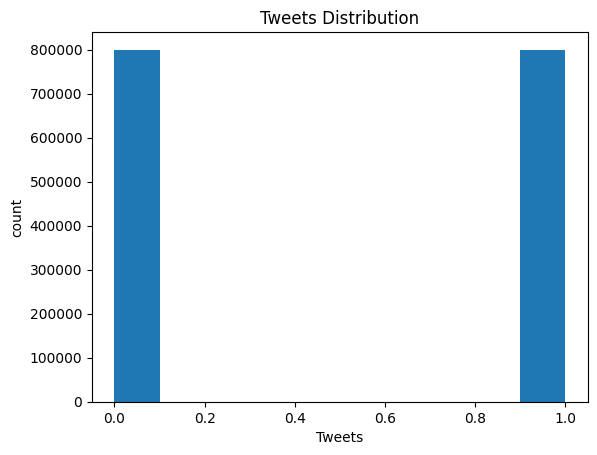

In [9]:
tweets.target.plot(kind='hist',title='Tweets Distribution',xlabel='Tweets' , ylabel='count')

In [10]:
port_stem = PorterStemmer()

In [11]:
short_tweets = tweets.iloc[:10000] # reduce the size of the data frame

In [12]:
short_tweets['stemed_text']=short_tweets.text.apply(lambda text : ' '.join([ port_stem.stem(word) for word in re.sub('[^a-zA-Z]',' ',text).lower().split() if word not in stopwords.words('english')]))

C:\Users\harkum\AppData\Local\Temp\ipykernel_25872\2628545536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_tweets['stemed_text']=short_tweets.text.apply(lambda text : ' '.join([ port_stem.stem(word) for word in re.sub('[^a-zA-Z]',' ',text).lower().split() if word not in stopwords.words('english')]))


In [13]:
short_tweets.head()

,target,id,date,flag,user,text,stemed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [14]:
# from textblob import TextBlob
# short_tweets.stemed_text.apply( lambda text : ' '.join([ TextBlob(word).correct() for word in text.split() ]))

In [39]:
# Seprate the data label 
X = short_tweets['stemed_text'].values
y= short_tweets['target'].values

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [41]:
# Convert the textual data to numerical data 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()



In [42]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)